## Gráficos da The Economist - Códigos e Estilos
## Fonte: https://towardsdatascience.com/making-economist-style-plots-in-matplotlib-e7de6d679739 

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from sklearn import model_selection
import statsmodels.api as sm

In [2]:
# Configurando o plot para ele sair em alta definição 
plt.rcParams['figure.dpi'] = 100

## Cores 


1.   Red, #DB444B
2.   Blue, #006BA2
3.   Cyan, #3EBCD2
4.   Green, #379A8B
5.   Yellow, #EBB434
6.   Olive, #B4BA39
7.   Purple, #9A607F
8.   Gold, #D1B07C




## Gráfico de Linhas

In [3]:
# Lendo o data set com o pandas 
data_set_Alemanha = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - Alemanha (1997 - 2019).xlsx')
data_set_Franca = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - França (1997 - 2019).xlsx')
data_set_UK = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - Reino Unido (1997 - 2019).xlsx')
data_set_Estados_Unidos_Novo = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - Estados Unidos (1997 - 2019).xlsx')
data_set_Italia = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - Itália (1997 - 2019).xlsx')
data_set_Brasil = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - Brasil (1997 - 2019).xlsx')
data_set_Chile = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - Chile (1997 - 2019).xlsx')

In [4]:
# Vizualizando o data set da Alemanha, por exemplo
data_set_Alemanha

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH
0,rgdpo,DEU,1997,2767329.50,37.770332,1507.676130
1,rgdpo,DEU,1998,2862586.00,38.217930,1504.559034
2,rgdpo,DEU,1999,2978213.00,38.807255,1491.513292
3,rgdpo,DEU,2000,3035471.75,39.603115,1465.937805
4,rgdpo,DEU,2001,3076616.00,39.451439,1458.165032
5,rgdpo,DEU,2002,3065723.00,39.233551,1448.923511
6,rgdpo,DEU,2003,3140563.50,38.825451,1443.408008
7,rgdpo,DEU,2004,3231047.25,38.972916,1442.584218
8,rgdpo,DEU,2005,3391866.50,38.923668,1432.423495
9,rgdpo,DEU,2006,3470312.00,39.186344,1453.188534


In [5]:
# Calculando a produtividade da Alemanha 
data_set_Alemanha["Produtividade"] = data_set_Alemanha['RGDPO']/(data_set_Alemanha['EMP']*data_set_Alemanha['AVH'])
data_set_Alemanha

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,DEU,1997,2767329.50,37.770332,1507.676130,48.596166
1,rgdpo,DEU,1998,2862586.00,38.217930,1504.559034,49.783125
2,rgdpo,DEU,1999,2978213.00,38.807255,1491.513292,51.453593
3,rgdpo,DEU,2000,3035471.75,39.603115,1465.937805,52.285504
4,rgdpo,DEU,2001,3076616.00,39.451439,1458.165032,53.481523
5,rgdpo,DEU,2002,3065723.00,39.233551,1448.923511,53.929927
6,rgdpo,DEU,2003,3140563.50,38.825451,1443.408008,56.040495
7,rgdpo,DEU,2004,3231047.25,38.972916,1442.584218,57.469740
8,rgdpo,DEU,2005,3391866.50,38.923668,1432.423495,60.835006
9,rgdpo,DEU,2006,3470312.00,39.186344,1453.188534,60.941314


In [6]:
# Calculando a produtividade do Brasil 
data_set_Brasil["Produtividade"] = data_set_Brasil['RGDPO']/(data_set_Brasil['EMP']*data_set_Brasil['AVH'])
data_set_Brasil

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,BRA,1997,1761591.875,62.795872,1845.731727,15.198671
1,rgdpo,BRA,1998,1687990.125,62.611366,1841.000000,14.644108
2,rgdpo,BRA,1999,1630691.750,65.889603,1813.842815,13.644428
3,rgdpo,BRA,2000,1653572.375,68.130455,1837.927050,13.205464
4,rgdpo,BRA,2001,1645849.750,68.456390,1828.326394,13.149900
5,rgdpo,BRA,2002,1657569.000,71.253647,1818.725739,12.790788
6,rgdpo,BRA,2003,1651363.000,72.304581,1811.182515,12.609984
7,rgdpo,BRA,2004,1738794.250,76.159279,1803.126089,12.661912
8,rgdpo,BRA,2005,1802951.500,78.414780,1783.131227,12.894450
9,rgdpo,BRA,2006,1967472.000,80.879120,1779.167851,13.672729


In [7]:
# Calculando a produtividade do Chile
data_set_Chile["Produtividade"] = data_set_Chile['RGDPO']/(data_set_Chile['EMP']*data_set_Chile['AVH'])
data_set_Chile

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,CHL,1997,182729.593750,5.265700,2256.0,15.382030
1,rgdpo,CHL,1998,180734.671875,5.385845,2299.0,14.596497
2,rgdpo,CHL,1999,172964.484375,5.366338,2277.0,14.155196
3,rgdpo,CHL,2000,179409.281250,5.536605,2263.0,14.319135
4,rgdpo,CHL,2001,178616.734375,5.619427,2242.0,14.177331
5,rgdpo,CHL,2002,180072.953125,5.736024,2250.0,13.952596
6,rgdpo,CHL,2003,188146.781250,5.895638,2235.0,14.278694
7,rgdpo,CHL,2004,209904.796875,6.012093,2232.0,15.642367
8,rgdpo,CHL,2005,235796.343750,6.230428,2157.0,17.545632
9,rgdpo,CHL,2006,275647.750000,6.450593,2165.0,19.737718


In [8]:
# Calculando a produtividade dos Estados Unidos 
data_set_Estados_Unidos_Novo["Produtividade"] = data_set_Estados_Unidos_Novo['RGDPO']/(data_set_Estados_Unidos_Novo['EMP']*data_set_Estados_Unidos_Novo['AVH'])
data_set_Estados_Unidos_Novo

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,USA,1997,12360252.0,132.362579,1828.488276,51.070478
1,rgdpo,USA,1998,12924324.0,134.500900,1839.196147,52.246187
2,rgdpo,USA,1999,13526821.0,136.756470,1841.333456,53.717454
3,rgdpo,USA,2000,14095967.0,138.636108,1844.853980,55.113313
4,rgdpo,USA,2001,14205419.0,138.646805,1823.659338,56.182423
5,rgdpo,USA,2002,14396938.0,138.152084,1806.690813,57.680479
6,rgdpo,USA,2003,14799683.0,138.690857,1790.841678,59.586433
7,rgdpo,USA,2004,15372598.0,140.270187,1789.527460,61.241177
8,rgdpo,USA,2005,15920553.0,142.493301,1787.013857,62.522420
9,rgdpo,USA,2006,16386528.0,145.094147,1787.351164,63.186917


In [9]:
# Calculando a produtividade da França 
data_set_Franca["Produtividade"] = data_set_Franca['RGDPO']/(data_set_Franca['EMP']*data_set_Franca['AVH'])
data_set_Franca

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,FRA,1997,1819024.125,24.003853,1595.645328,47.492074
1,rgdpo,FRA,1998,1921072.875,24.439314,1585.289681,49.584530
2,rgdpo,FRA,1999,2011288.125,25.020395,1578.304510,50.931835
3,rgdpo,FRA,2000,2128715.250,25.625225,1558.338802,53.307461
4,rgdpo,FRA,2001,2185648.250,25.974291,1537.956604,54.713247
5,rgdpo,FRA,2002,2197271.750,26.102304,1503.886735,55.974445
6,rgdpo,FRA,2003,2144133.750,26.124199,1507.256771,54.452979
7,rgdpo,FRA,2004,2188098.250,26.165403,1530.856012,54.626709
8,rgdpo,FRA,2005,2372596.750,26.334572,1532.075909,58.805424
9,rgdpo,FRA,2006,2432615.500,26.609587,1515.011200,60.341972


In [10]:
# Calculando a produtividade da Itália 
data_set_Italia["Produtividade"] = data_set_Italia['RGDPO']/(data_set_Italia['EMP']*data_set_Italia['AVH'])
data_set_Italia

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,ITA,1997,1856405.25,22.111740,1859.863898,45.140743
1,rgdpo,ITA,1998,1942746.25,22.267738,1873.132928,46.576985
2,rgdpo,ITA,1999,1997615.00,22.472488,1869.878018,47.538705
3,rgdpo,ITA,2000,2046561.75,22.917969,1850.197971,48.264802
4,rgdpo,ITA,2001,2047270.50,23.430450,1837.636217,47.548306
5,rgdpo,ITA,2002,2019462.75,23.917112,1826.190095,46.236092
6,rgdpo,ITA,2003,2028394.50,24.322321,1815.103813,45.945813
7,rgdpo,ITA,2004,2040372.75,24.474260,1814.615542,45.942573
8,rgdpo,ITA,2005,2123677.25,24.632336,1811.101718,47.603631
9,rgdpo,ITA,2006,2202942.75,25.155275,1811.851615,48.333863


In [11]:
# Calculando a produtividade do Reino Unido 
data_set_UK["Produtividade"] = data_set_UK['RGDPO']/(data_set_UK['EMP']*data_set_UK['AVH'])
data_set_UK

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,GBR,1997,1829166.375,26.408014,1721.195442,40.242715
1,rgdpo,GBR,1998,1879454.625,26.690899,1716.999440,41.010824
2,rgdpo,GBR,1999,1958917.875,27.067028,1708.610393,42.357724
3,rgdpo,GBR,2000,2075158.750,27.380348,1692.953954,44.767951
4,rgdpo,GBR,2001,2121908.250,27.595715,1695.976472,45.338290
5,rgdpo,GBR,2002,2123617.000,27.803614,1678.561396,45.502758
6,rgdpo,GBR,2003,2166739.250,28.060053,1669.380343,46.255446
7,rgdpo,GBR,2004,2220801.250,28.353535,1666.715738,46.993842
8,rgdpo,GBR,2005,2377112.250,28.672586,1669.737173,49.651766
9,rgdpo,GBR,2006,2415816.250,29.001076,1663.985723,50.061078


In [12]:
# Transformando nossos data sets em séries temporais 
data_set_Alemanha['YearCode'] = pd.to_datetime(data_set_Alemanha['YearCode'], format='%Y')
data_set_Franca['YearCode'] = pd.to_datetime(data_set_Franca['YearCode'], format='%Y')
data_set_Estados_Unidos_Novo['YearCode'] = pd.to_datetime(data_set_Estados_Unidos_Novo['YearCode'], format='%Y')
data_set_UK['YearCode'] = pd.to_datetime(data_set_UK['YearCode'], format='%Y')
data_set_Italia['YearCode'] = pd.to_datetime(data_set_Italia['YearCode'], format='%Y')
data_set_Brasil['YearCode'] = pd.to_datetime(data_set_Brasil['YearCode'], format='%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


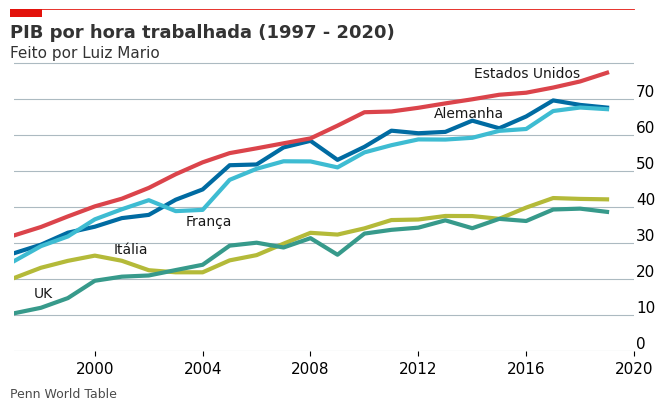

In [13]:
# Gerando o gráfico 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Plotando os dados 
ax.plot(data_set_Alemanha[data_set_Alemanha['RegionCode'] == 'DEU']['YearCode'], 
        data_set_Alemanha[data_set_Alemanha['RegionCode'] == 'DEU']['Produtividade'], 
        color='#006BA2', #Azul
        linewidth=3)
ax.plot(data_set_Franca[data_set_Franca['RegionCode'] == 'FRA']['YearCode'], 
        data_set_Franca[data_set_Franca['RegionCode'] == 'FRA']['Produtividade'], 
        color='#3EBCD2', #Cyan
        linewidth=3)
ax.plot(data_set_Estados_Unidos_Novo[data_set_Estados_Unidos_Novo['RegionCode'] == 'USA']['YearCode'], 
        data_set_Estados_Unidos_Novo[data_set_Estados_Unidos_Novo['RegionCode'] == 'USA']['Produtividade'], 
        color='#DB444B', #Vermelho
        linewidth=3)
ax.plot(data_set_Italia[data_set_Italia['RegionCode'] == 'ITA']['YearCode'], 
        data_set_Italia[data_set_Italia['RegionCode'] == 'ITA']['Produtividade'], 
        color='#B4BA39', #Oliva
        linewidth=3)
ax.plot(data_set_UK[data_set_UK['RegionCode'] == 'GBR']['YearCode'], 
        data_set_UK[data_set_UK['RegionCode'] == 'GBR']['Produtividade'], 
        color='#379A8B', #Verde
        linewidth=3)
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 
ax.set_ylim(35,77)
# Configurando o limite para x 
ax.set_xlim(pd.datetime(1997, 1, 1), pd.datetime(2020, 1, 1))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.set_yticklabels(np.arange(0,80,10), 
                   ha = 'left',
                   verticalalignment='bottom')
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.70, y=.81, s='Estados Unidos', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.34, y=.44, s='França', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.65, y=.71, s='Alemanha', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.15, y=.26, s='UK', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.25, y=.37, s='Itália', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.91, s="PIB por hora trabalhada (1997 - 2020)", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Penn World Table""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Plotando o gráfico            
plt.savefig('/content/Gráficos',           # Configurando o caminho e o nome do arquivo
            dpi = 300,                     # Configurando os pontos por polegada
            bbox_inches="tight",           # Removendo espaço em branco extra
            facecolor='white')             # Configurando o fundo para branco

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


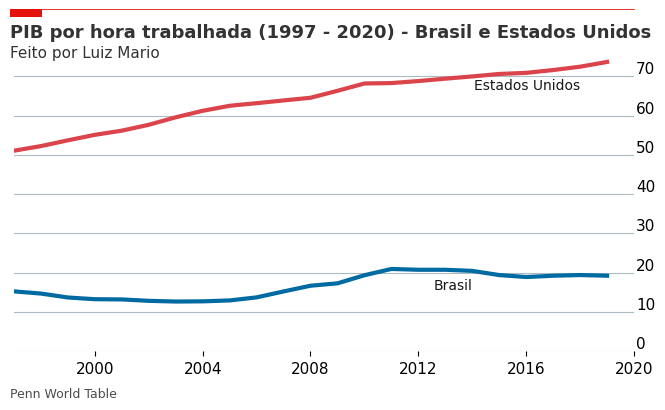

In [14]:
# Gráfico Estados Unidos x Brasil 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Plotando os dados 
ax.plot(data_set_Brasil[data_set_Brasil['RegionCode'] == 'BRA']['YearCode'], 
        data_set_Brasil[data_set_Brasil['RegionCode'] == 'BRA']['Produtividade'], 
        color='#006BA2', #Azul
        linewidth=3)
ax.plot(data_set_Estados_Unidos_Novo[data_set_Estados_Unidos_Novo['RegionCode'] == 'USA']['YearCode'], 
        data_set_Estados_Unidos_Novo[data_set_Estados_Unidos_Novo['RegionCode'] == 'USA']['Produtividade'], 
        color='#DB444B', #Vermelho
        linewidth=3)
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 
ax.set_ylim(0,77)
# Configurando o limite para x 
ax.set_xlim(pd.datetime(1997, 1, 1), pd.datetime(2020, 1, 1))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.set_yticklabels(np.arange(0,80,10), 
                   ha = 'left',
                   verticalalignment='bottom')
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.70, y=.78, s='Estados Unidos', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.65, y=.28, s='Brasil', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.91, s="PIB por hora trabalhada (1997 - 2020) - Brasil e Estados Unidos", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Penn World Table""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Plotando o gráfico            
plt.savefig('/content/Gráficos',           # Configurando o caminho e o nome do arquivo
            dpi = 300,                     # Configurando os pontos por polegada
            bbox_inches="tight",           # Removendo espaço em branco extra
            facecolor='white')             # Configurando o fundo para branco

## Gráfico PIB por Trabalhador - Brasil (1980 - 2019) 

In [18]:
# Criando o data set 
data_set_Brasil_PIB_L = pd.read_excel('PIB, População e Trabalhadores - Brasil (1950-2019).xlsx')

In [19]:
# Vizualizando o data set 
data_set_Brasil_PIB_L

,Variable Code,RegionCode,YearCode,RGDPO,EMP,Population
0,rgdpo,BRA,1980,7.093135e+05,43.310600,120.694009
1,rgdpo,BRA,1981,7.351479e+05,45.122349,123.570327
2,rgdpo,BRA,1982,7.523427e+05,47.564236,126.498314
3,rgdpo,BRA,1983,7.365008e+05,48.100803,129.448819
4,rgdpo,BRA,1984,7.639584e+05,49.829929,132.383568
5,rgdpo,BRA,1985,8.039100e+05,53.524902,135.274080
6,rgdpo,BRA,1986,9.188306e+05,55.017719,138.108912
7,rgdpo,BRA,1987,9.495213e+05,56.976795,140.891602
8,rgdpo,BRA,1988,9.566518e+05,58.944199,143.627503
9,rgdpo,BRA,1989,9.781645e+05,60.164524,146.328304


In [20]:
# Calculando a razão PIB/L 
data_set_Brasil_PIB_L["RGDPO/EMP"] = data_set_Brasil_PIB_L['RGDPO']/data_set_Brasil_PIB_L['EMP']
data_set_Brasil_PIB_L

,Variable Code,RegionCode,YearCode,RGDPO,EMP,Population,RGDPO/EMP
0,rgdpo,BRA,1980,7.093135e+05,43.310600,120.694009,16377.364788
1,rgdpo,BRA,1981,7.351479e+05,45.122349,123.570327,16292.324254
2,rgdpo,BRA,1982,7.523427e+05,47.564236,126.498314,15817.403068
3,rgdpo,BRA,1983,7.365008e+05,48.100803,129.448819,15311.610167
4,rgdpo,BRA,1984,7.639584e+05,49.829929,132.383568,15331.315636
5,rgdpo,BRA,1985,8.039100e+05,53.524902,135.274080,15019.364161
6,rgdpo,BRA,1986,9.188306e+05,55.017719,138.108912,16700.629810
7,rgdpo,BRA,1987,9.495213e+05,56.976795,140.891602,16665.053014
8,rgdpo,BRA,1988,9.566518e+05,58.944199,143.627503,16229.787411
9,rgdpo,BRA,1989,9.781645e+05,60.164524,146.328304,16258.160685


In [21]:
# Transformando o data set em uma série temporal 
data_set_Brasil_PIB_L['YearCode'] = pd.to_datetime(data_set_Brasil_PIB_L['YearCode'], format='%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


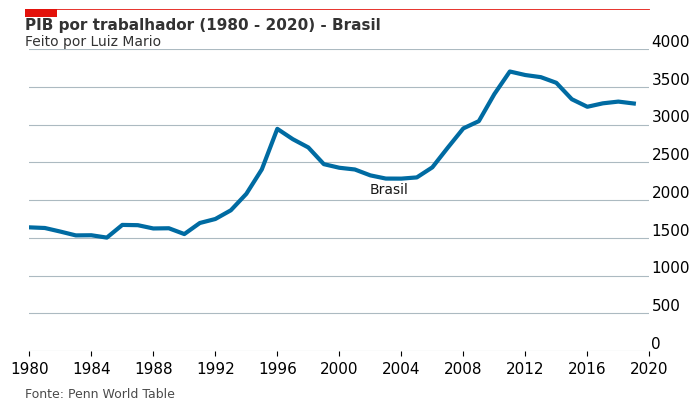

In [22]:
# Gráfico aos moldes da The Economist 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Plotando os dados 
ax.plot(data_set_Brasil_PIB_L[data_set_Brasil_PIB_L['RegionCode'] == 'BRA']['YearCode'], 
        data_set_Brasil_PIB_L[data_set_Brasil_PIB_L['RegionCode'] == 'BRA']['RGDPO/EMP'], 
        color='#006BA2', #Azul
        linewidth=3)
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 
ax.set_ylim(0,40000)
# Configurando o limite para x 
ax.set_xlim(pd.datetime(1980, 1, 1), pd.datetime(2020, 1, 1))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.set_yticklabels(np.arange(0,40000,500), 
                   ha = 'left',
                   verticalalignment='bottom')
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.55, y=.52, s='Brasil', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.93, s="PIB por trabalhador (1980 - 2020) - Brasil", transform=fig.transFigure, ha='left', fontsize=11, weight='bold', alpha=.8)
ax.text(x=0.12, y=.89, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=10, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Fonte: Penn World Table""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Plotando o gráfico            
plt.savefig('/content/Gráficos',           # Configurando o caminho e o nome do arquivo
            dpi = 300,                     # Configurando os pontos por polegada
            bbox_inches="tight",           # Removendo espaço extra em branco 
            facecolor='white')             # Configurando o fundo de tela para branco

In [23]:
# Cálculo do PIB per Capita 
data_set_Brasil_PIB_L["PIB per Capita"] = data_set_Brasil_PIB_L['RGDPO']/data_set_Brasil_PIB_L['Population']
data_set_Brasil_PIB_L

,Variable Code,RegionCode,YearCode,RGDPO,EMP,Population,RGDPO/EMP,PIB per Capita
0,rgdpo,BRA,1980-01-01,7.093135e+05,43.310600,120.694009,16377.364788,5876.956991
1,rgdpo,BRA,1981-01-01,7.351479e+05,45.122349,123.570327,16292.324254,5949.227095
2,rgdpo,BRA,1982-01-01,7.523427e+05,47.564236,126.498314,15817.403068,5947.452292
3,rgdpo,BRA,1983-01-01,7.365008e+05,48.100803,129.448819,15311.610167,5689.513089
4,rgdpo,BRA,1984-01-01,7.639584e+05,49.829929,132.383568,15331.315636,5770.794567
5,rgdpo,BRA,1985-01-01,8.039100e+05,53.524902,135.274080,15019.364161,5942.823636
6,rgdpo,BRA,1986-01-01,9.188306e+05,55.017719,138.108912,16700.629810,6652.941864
7,rgdpo,BRA,1987-01-01,9.495213e+05,56.976795,140.891602,16665.053014,6739.374803
8,rgdpo,BRA,1988-01-01,9.566518e+05,58.944199,143.627503,16229.787411,6660.645019
9,rgdpo,BRA,1989-01-01,9.781645e+05,60.164524,146.328304,16258.160685,6684.725192


In [24]:
# Calculando a razão PIB per Capita por trabalhador 
data_set_Brasil_PIB_L["PIB per Capita/Trabalhador"] = data_set_Brasil_PIB_L['PIB per Capita']/data_set_Brasil_PIB_L['EMP']
data_set_Brasil_PIB_L

,Variable Code,RegionCode,YearCode,RGDPO,EMP,Population,RGDPO/EMP,PIB per Capita,PIB per Capita/Trabalhador
0,rgdpo,BRA,1980-01-01,7.093135e+05,43.310600,120.694009,16377.364788,5876.956991,135.693270
1,rgdpo,BRA,1981-01-01,7.351479e+05,45.122349,123.570327,16292.324254,5949.227095,131.846574
2,rgdpo,BRA,1982-01-01,7.523427e+05,47.564236,126.498314,15817.403068,5947.452292,125.040426
3,rgdpo,BRA,1983-01-01,7.365008e+05,48.100803,129.448819,15311.610167,5689.513089,118.283120
4,rgdpo,BRA,1984-01-01,7.639584e+05,49.829929,132.383568,15331.315636,5770.794567,115.809808
5,rgdpo,BRA,1985-01-01,8.039100e+05,53.524902,135.274080,15019.364161,5942.823636,111.029136
6,rgdpo,BRA,1986-01-01,9.188306e+05,55.017719,138.108912,16700.629810,6652.941864,120.923622
7,rgdpo,BRA,1987-01-01,9.495213e+05,56.976795,140.891602,16665.053014,6739.374803,118.282799
8,rgdpo,BRA,1988-01-01,9.566518e+05,58.944199,143.627503,16229.787411,6660.645019,112.999162
9,rgdpo,BRA,1989-01-01,9.781645e+05,60.164524,146.328304,16258.160685,6684.725192,111.107422


In [25]:
# Transformando o data set em uma série temporal 
data_set_Brasil_PIB_L['YearCode'] = pd.to_datetime(data_set_Brasil_PIB_L['YearCode'], format='%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


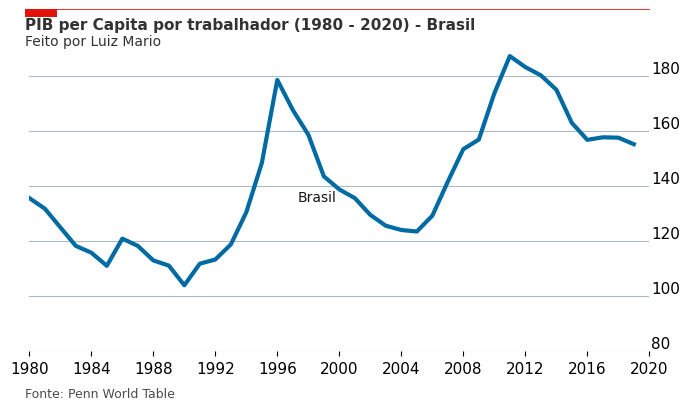

In [26]:
# Gerando o gráfico 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Plotando os dados 
ax.plot(data_set_Brasil_PIB_L[data_set_Brasil_PIB_L['RegionCode'] == 'BRA']['YearCode'], 
        data_set_Brasil_PIB_L[data_set_Brasil_PIB_L['RegionCode'] == 'BRA']['PIB per Capita/Trabalhador'], 
        color='#006BA2', #Azul
        linewidth=3)
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 
ax.set_ylim(80,190)
# Configurando o limite para x 
ax.set_xlim(pd.datetime(1980, 1, 1), pd.datetime(2020, 1, 1))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.set_yticklabels(np.arange(80,190,20), 
                   ha = 'left',
                   verticalalignment='bottom')
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.46, y=.50, s='Brasil', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.93, s="PIB per Capita por trabalhador (1980 - 2020) - Brasil", transform=fig.transFigure, ha='left', fontsize=11, weight='bold', alpha=.8)
ax.text(x=0.12, y=.89, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=10, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Fonte: Penn World Table""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Plotando o gráfico            
plt.savefig('/content/Gráficos',           # Configurando caminho e o nome do arquivo
            dpi = 300,                     # Configurando os pontos por polegada (Resolução)
            bbox_inches="tight",           # Removendo espaço em branco extra 
            facecolor='white')             # Configurando o fundo de tela para branco

## Quantas horas trabalham os trabalhadores (horas por trabalhador) do Brasil, Estados Unidos e Espanha – Como foi essa evolução nos últimos 30 anos ? 

In [27]:
# Criando os data sets 
data_set_horas_Brasil = pd.read_excel('Horas Trabalhadas, Trabalhadores e PIB - Brasil (1980 - 2020).xlsx')
data_set_horas_Espanha = pd.read_excel('Horas Trabalhadas, Trabalhadores e PIB - Espanha (1980 - 2020).xlsx')
data_set_horas_Estados_Unidos = pd.read_excel('Horas Trabalhadas, Trabalhadores e PIB - Estados Unidos (1980 - 2020).xlsx')

In [28]:
# Vizualizando o data set do Brasil
data_set_horas_Brasil

,VariableCode,RegionCode,YearCode,RGDPO,AVH,EMP
0,rgdpo,BRA,1980,7.093135e+05,1985.000000,43.310600
1,rgdpo,BRA,1981,7.351479e+05,1974.096823,45.122349
2,rgdpo,BRA,1982,7.523427e+05,1963.253535,47.564236
3,rgdpo,BRA,1983,7.365008e+05,1952.469807,48.100803
4,rgdpo,BRA,1984,7.639584e+05,1941.745312,49.829929
5,rgdpo,BRA,1985,8.039100e+05,1931.079724,53.524902
6,rgdpo,BRA,1986,9.188306e+05,1920.472719,55.017719
7,rgdpo,BRA,1987,9.495213e+05,1909.923977,56.976795
8,rgdpo,BRA,1988,9.566518e+05,1899.433177,58.944199
9,rgdpo,BRA,1989,9.781645e+05,1889.000000,60.164524


In [29]:
# Vizualizando o data set da Espanha
data_set_horas_Espanha

,VariableCode,RegionCode,YearCode,RGDPO,AVH,EMP
0,rgdpo,ESP,1980,6.067975e+05,1918.122439,12.724004
1,rgdpo,ESP,1981,5.768439e+05,1884.020431,12.422123
2,rgdpo,ESP,1982,5.581088e+05,1862.925426,12.316823
3,rgdpo,ESP,1983,5.465781e+05,1830.757419,12.274412
4,rgdpo,ESP,1984,5.375381e+05,1786.692409,11.997965
5,rgdpo,ESP,1985,5.303874e+05,1776.700407,11.866978
6,rgdpo,ESP,1986,5.645091e+05,1768.667405,12.125779
7,rgdpo,ESP,1987,6.053188e+05,1760.649403,12.682387
8,rgdpo,ESP,1988,6.482821e+05,1756.578402,13.096704
9,rgdpo,ESP,1989,6.906510e+05,1744.560399,13.543133


In [30]:
# Vizualizando o data set dos Estados Unidos
data_set_horas_Estados_Unidos

,VariableCode,RegionCode,YearCode,RGDPO,AVH,EMP
0,rgdpo,USA,1980,7309359.0,1801.611445,103.070930
1,rgdpo,USA,1981,7496486.5,1790.005617,104.216179
2,rgdpo,USA,1982,7323942.0,1770.666091,103.408577
3,rgdpo,USA,1983,7655244.0,1779.871537,104.779137
4,rgdpo,USA,1984,8235799.0,1795.576641,109.116043
5,rgdpo,USA,1985,8533360.0,1801.137378,111.384384
6,rgdpo,USA,1986,8808309.0,1780.839365,113.924011
7,rgdpo,USA,1987,9116680.0,1788.517421,116.886093
8,rgdpo,USA,1988,9489531.0,1798.271529,119.454811
9,rgdpo,USA,1989,9822400.0,1810.293103,121.828072


In [31]:
# Transformando os data sets em Séries temporais 
data_set_horas_Brasil['YearCode'] = pd.to_datetime(data_set_horas_Brasil['YearCode'], format='%Y')
data_set_horas_Espanha['YearCode'] = pd.to_datetime(data_set_horas_Espanha['YearCode'], format='%Y')
data_set_horas_Estados_Unidos['YearCode'] = pd.to_datetime(data_set_horas_Estados_Unidos['YearCode'], format='%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


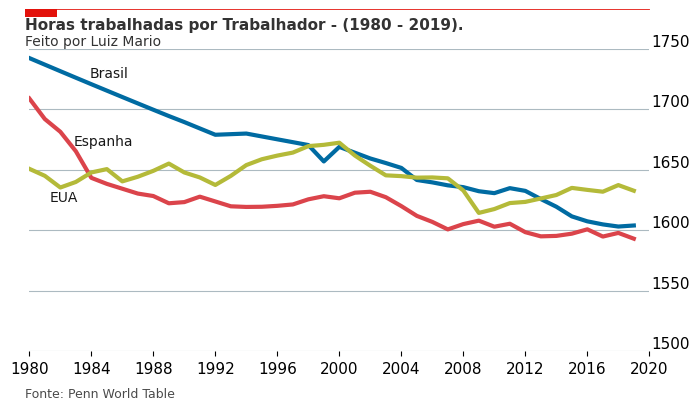

In [32]:
# Gerando o gráfico 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Plotando os dados 
ax.plot(data_set_horas_Brasil[data_set_horas_Brasil['RegionCode'] == 'BRA']['YearCode'], 
        data_set_horas_Brasil[data_set_horas_Brasil['RegionCode'] == 'BRA']['AVH'], 
        color='#006BA2', #Azul
        linewidth=3)
ax.plot(data_set_horas_Espanha[data_set_horas_Espanha['RegionCode'] == 'ESP']['YearCode'], 
        data_set_horas_Espanha[data_set_horas_Espanha['RegionCode'] == 'ESP']['AVH'], 
        color='#DB444B', #Vermelho
        linewidth=3)
ax.plot(data_set_horas_Estados_Unidos[data_set_horas_Estados_Unidos['RegionCode'] == 'USA']['YearCode'], 
        data_set_horas_Estados_Unidos[data_set_horas_Estados_Unidos['RegionCode'] == 'USA']['AVH'], 
        color='#B4BA39', #Oliva
        linewidth=3)
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 
ax.set_ylim(1500,2000)
# Configurando o limite para x 
ax.set_xlim(pd.datetime(1980, 1, 1), pd.datetime(2020, 1, 1))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.set_yticklabels(np.arange(1500,2000,50), 
                   ha = 'left',
                   verticalalignment='bottom')
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.20, y=.81, s='Brasil', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.15, y=.50, s='EUA', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.18, y=.64, s='Espanha', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.93, s="Horas trabalhadas por Trabalhador - (1980 - 2019).", transform=fig.transFigure, ha='left', fontsize=11, weight='bold', alpha=.8)
ax.text(x=0.12, y=.89, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=10, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Fonte: Penn World Table""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Plotando o gráfico            
plt.savefig('/content/Gráficos',           # Configurando caminho e o nome do arquivo
            dpi = 300,                     # Configurando os pontos por polegada (Resolução)
            bbox_inches="tight",           # Removendo espaço em branco extra
            facecolor='white')             # Configurando o fundo de tela para branco

## Gráfico de Dispersão 

In [33]:
# Criando o data set 
data_set_Diversos_Países = pd.read_excel('PIB,População e Pessoas Empregadas - Diversos Países.xlsx')

In [34]:
# Vizualizando o data set
data_set_Diversos_Países

,Continent,RegionCode,YearCode,RGDPO,Population,EMP
0,Ásia,Emirados Árabes Unidos,2019,6.459562e+05,9.770529,5.808834
1,Europa,Albânia,2019,3.610304e+04,2.880917,1.075898
2,África,Angola,2019,2.278557e+05,31.825295,16.644962
3,América do Sul,Argentina,2019,9.774206e+05,44.780677,20.643215
4,Oceânia,Austrália,2019,1.364678e+06,25.203198,12.863174
5,Ásia,Azerbaijão,2019,1.593460e+05,10.047718,5.027179
6,Europa,Bélgica,2019,5.174198e+05,11.539328,4.921937
7,América do Sul,Brasil,2019,3.080048e+06,211.049527,93.956825
8,América do Norte,Canadá,2019,1.866215e+06,37.411047,19.298662
9,Europa,Suíça,2019,6.469196e+05,8.591365,5.011205


In [35]:
# Calculando o PIB per Capita de cada país
data_set_Diversos_Países["PIB per Capita"] = data_set_Diversos_Países['RGDPO']/data_set_Diversos_Países['Population']
data_set_Diversos_Países

,Continent,RegionCode,YearCode,RGDPO,Population,EMP,PIB per Capita
0,Ásia,Emirados Árabes Unidos,2019,6.459562e+05,9.770529,5.808834,66112.720202
1,Europa,Albânia,2019,3.610304e+04,2.880917,1.075898,12531.788652
2,África,Angola,2019,2.278557e+05,31.825295,16.644962,7159.579157
3,América do Sul,Argentina,2019,9.774206e+05,44.780677,20.643215,21826.837555
4,Oceânia,Austrália,2019,1.364678e+06,25.203198,12.863174,54147.007455
5,Ásia,Azerbaijão,2019,1.593460e+05,10.047718,5.027179,15858.924385
6,Europa,Bélgica,2019,5.174198e+05,11.539328,4.921937,44839.677839
7,América do Sul,Brasil,2019,3.080048e+06,211.049527,93.956825,14593.960687
8,América do Norte,Canadá,2019,1.866215e+06,37.411047,19.298662,49884.058979
9,Europa,Suíça,2019,6.469196e+05,8.591365,5.011205,75298.817475


In [36]:
# Calculando a razão Empregados/População
data_set_Diversos_Países["Empregados/População"] = data_set_Diversos_Países['EMP']/data_set_Diversos_Países['Population']
data_set_Diversos_Países

,Continent,RegionCode,YearCode,RGDPO,Population,EMP,PIB per Capita,Empregados/População
0,Ásia,Emirados Árabes Unidos,2019,6.459562e+05,9.770529,5.808834,66112.720202,0.594526
1,Europa,Albânia,2019,3.610304e+04,2.880917,1.075898,12531.788652,0.373457
2,África,Angola,2019,2.278557e+05,31.825295,16.644962,7159.579157,0.523010
3,América do Sul,Argentina,2019,9.774206e+05,44.780677,20.643215,21826.837555,0.460985
4,Oceânia,Austrália,2019,1.364678e+06,25.203198,12.863174,54147.007455,0.510379
5,Ásia,Azerbaijão,2019,1.593460e+05,10.047718,5.027179,15858.924385,0.500330
6,Europa,Bélgica,2019,5.174198e+05,11.539328,4.921937,44839.677839,0.426536
7,América do Sul,Brasil,2019,3.080048e+06,211.049527,93.956825,14593.960687,0.445189
8,América do Norte,Canadá,2019,1.866215e+06,37.411047,19.298662,49884.058979,0.515855
9,Europa,Suíça,2019,6.469196e+05,8.591365,5.011205,75298.817475,0.583284


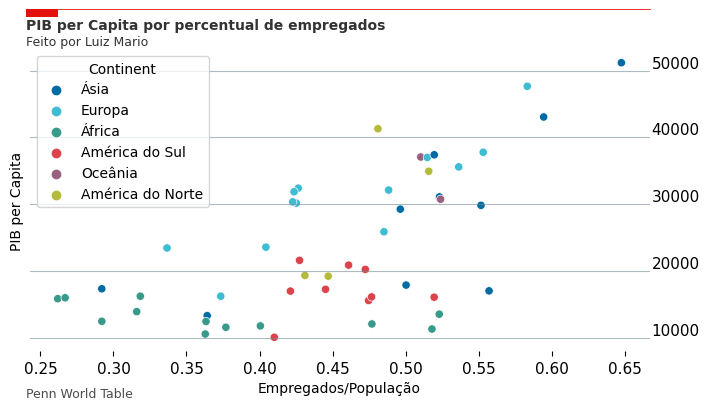

In [37]:
# Gráfico de Dispersão 
# Gerando o gráfico 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Definindo uma paleta de cores 
colors = ["#006BA2","#3EBCD2","#379A8B","#DB444B","#9A607F","#B4BA39"]
sns.set_palette(sns.color_palette(colors))
# Plotando os dados 
ax = sns.scatterplot(x='Empregados/População', y='PIB per Capita', data= data_set_Diversos_Países, hue='Continent')
# Removendo os splines
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.set_yticklabels(np.arange(0,83000,10000), 
                   ha = 'left',
                   verticalalignment='bottom')
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.set(xlabel = 'Empregados/População',ylabel ='PIB per Capita')
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.93, s="PIB per Capita por percentual de empregados", transform=fig.transFigure, ha='left', fontsize=10, weight='bold', alpha=.8)
ax.text(x=0.12, y=.89, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=9, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Penn World Table""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Plotando o gráfico            
plt.savefig('/content/Gráficos',           # Configurando caminho e nome do arquivo
            dpi = 300,                     # Configurando os pontos por polegada (Resolução)
            bbox_inches="tight",           # Removendo espaço em branco extra
            facecolor='white')             # Configurando o fundo de tela para branco

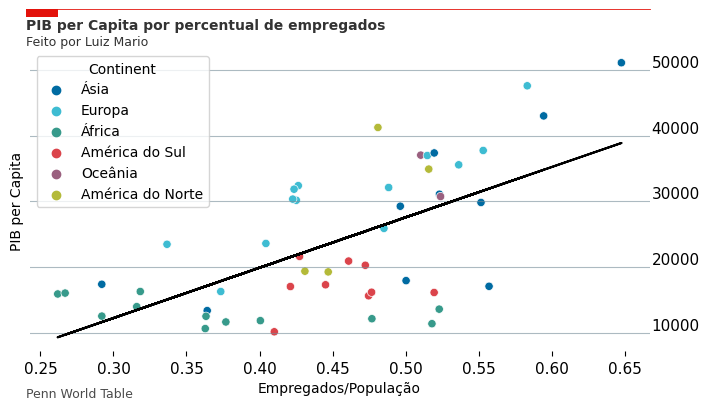

In [38]:
# Gráfico de Dispersão com a regressão 
# Gerando o gráfico 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Definindo uma paleta de cores 
colors = ["#006BA2","#3EBCD2","#379A8B","#DB444B","#9A607F","#B4BA39"]
sns.set_palette(sns.color_palette(colors))
# Plotando os dados 
ax = sns.scatterplot(x='Empregados/População', y='PIB per Capita', data= data_set_Diversos_Países, hue='Continent')
# Removendo os splines
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.set_yticklabels(np.arange(0,83000,10000), 
                   ha = 'left',
                   verticalalignment='bottom')
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.set(xlabel = 'Empregados/População',ylabel ='PIB per Capita')
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.93, s="PIB per Capita por percentual de empregados", transform=fig.transFigure, ha='left', fontsize=10, weight='bold', alpha=.8)
ax.text(x=0.12, y=.89, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=9, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Penn World Table""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Adicionando a regressão 
# Definindo parâmetros x e y
x = data_set_Diversos_Países['Empregados/População']
y = data_set_Diversos_Países['PIB per Capita']
regressao_paises = slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
ax.plot(x,line,color = 'black',label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.savefig('/content/Gráficos',           # Configurando caminho e nome do arquivo
            dpi = 300,                     # Configurando os pontos por polegada 
            bbox_inches="tight",           # Removendo espaço extra em branco
            facecolor='white')             # Configurando o fundo de tela para branco

## Gráfico de Barras 

## Gráfico de Boxplot